# KEN3450, Data Analysis, Spring 2020 

## Clinic 1: EDA of Movies 

**Błażej Dolicki - i6155906**

---

## Part 1: Loading and Cleaning with Pandas 
Here is a description of the columns (in order) present in this csv file:

```
id: a unique identifier for each movie
title: the title of the movie
cast: name of most recognizeable cast members seperated by a "|"
director: name of the director (if more than one, different names seperated by a "|"
runtime: duration of movie in min.
genres: categories of the movie seperated by a "|"
release_date: exact date of the release in the format MM/DD/YY or MM/DD/YYYY
users_voted: how many users have cast their vote for this movie
rating: average rating for the movie (scale 0-5)
release_year: the year of release
budget: production costs in US dollars
revenue: revenue income in US dollars
```

----

Load the appropriate libraries

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

### Cleaning: Reading in the data

In [3]:
#Read the data into a dataframe
df = pd.read_csv("movies.csv", parse_dates=["release_date"])

In [4]:
df.head()

,id,title,cast,director,runtime,genres,release_date,users_voted,rating,release_year,budget,revenue
0,135397,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,3.25,2015,150000000,1513528810
1,76341,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,3.55,2015,150000000,378436354
2,262500,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,3.15,2015,110000000,295238201
3,140607,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,3.75,2015,200000000,2068178225
4,168259,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,3.65,2015,190000000,1506249360


There are more than two date formats in `release_date` column, therefore it's not possible to parse the dates with `to_datetime()` method. Thankfully, this issue is solved by adding the `parse_dates` argument - the dates are properly parsed.

### Cleaning: Examing the dataframe - quick checks

We should examine the dataframe to get a overall sense of the content. 

In [5]:
df.dtypes

id                       int64
title                   object
cast                    object
director                object
runtime                  int64
genres                  object
release_date    datetime64[ns]
users_voted              int64
rating                 float64
release_year             int64
budget                   int64
revenue                  int64
dtype: object

Everything seems okay, numeric variables are indeed numeric and string variables are of type object.

In [6]:
df.shape

(10866, 12)

**B** There are 10866 movies, each with 12 features

In [7]:
df.describe()

,id,runtime,users_voted,rating,release_year,budget,revenue
count,10866.000000,10866.000000,10866.000000,10861.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,102.070863,217.389748,2.987386,2001.322658,1.462570e+07,3.982332e+07
std,92130.136561,31.381405,575.619058,0.467639,12.812941,3.091321e+07,1.170035e+08
min,5.000000,0.000000,10.000000,0.750000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,90.000000,17.000000,2.700000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,99.000000,38.000000,3.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,111.000000,145.750000,3.300000,2011.000000,1.500000e+07,2.400000e+07
max,417859.000000,900.000000,9767.000000,4.600000,2015.000000,4.250000e+08,2.781506e+09


The above method summarizes some basic statistics. It helps to make sanity checks on edge values - for example rating should be between 0 and 5. Here you can see that min value of rating is 0.75 and max value is 4.6 so this is correct. Based on common sense, none of the numerical variables should be negative - looking at the above table, it checks out. This may seem irrelevant, but even from my short work experience I can tell situations like that happen sometimes.

It's also worth checking any numbers that seem weird. Often this means that there's an error. For example maximum runtime is 900 which means that some movie supposedly is 15 hours long, which would be quite bizarre.

After checking the title and googling it, it appears that the film was presented in 15 one-hour chapters. So everything is correct in this case.

### Cleaning: Examining the dataframe - a deeper look

In [8]:
df.isna().sum()

id               0
title            0
cast            76
director        44
runtime          0
genres          23
release_date     0
users_voted      0
rating           5
release_year     0
budget           0
revenue          0
dtype: int64

As mentioned in the docs, the `describe()` method excludes NaN values when computing statistics.

### Cleaning: Dealing with Missing Values
How should we interpret 'missing' or 'invalid' values in the data (hint: look at where these values occur)?

Think of the techniques we discussed during lecture and apply it below. Remember that there is no golden rule about which technique is best, as long as you as an experienced data scientist report how you handled them.

Fortunately, there are not many missing values. For the purpose of data exploration, I think the best choice is to use a separate "Unknown" class for categorical variables. This is a common choice in many visualizations. Substituting missing values with the most common categories etc. might significantly change the dataset. For `rating` we can just replace it with the mean, it's only 5 rows anyway...

In [9]:
df[['cast','director','genres']] = df[['cast','director','genres']].fillna("Unknown")

In [10]:
df['rating'].fillna(df['rating'].mean(),inplace=True)

Let's check if it worked.

In [11]:
print("Any missing values left?",df.isna().sum().any())

Any missing values left? False


##  Part 2: Asking Questions
Think of few questions we want to ask and then examine the data and decide if the dataframe contains what you need to address these questions. 

**Example:** Which are the highest rated movies? To determine this, you'll only need the data in two columns: `title` and `rating`. The task will be to sort these two columns by the value in `rating`.

Try to formulate questions that you can explain to non-scientists and use your imagination (e.g. look for your favorite actor or movie)

[5 min]

In [12]:
df.head()

,id,title,cast,director,runtime,genres,release_date,users_voted,rating,release_year,budget,revenue
0,135397,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,3.25,2015,150000000,1513528810
1,76341,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,3.55,2015,150000000,378436354
2,262500,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,3.15,2015,110000000,295238201
3,140607,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,3.75,2015,200000000,2068178225
4,168259,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,3.65,2015,190000000,1506249360


### Questions
1. Which actor has the best average movie rating?
2. Which director made the most movies?
3. Is there a correlation betwen release date and revenue? Are there any periods especially beneficial for releasing a movie? (For example winter, when days are short and it's cold outside)
4. Is there a correlation between the budget and revenue? (Intuitively, there should be a positive correlation)
5. Is there a correlation between the revenue and the rating? (Theoretically, revenue means a lot of people saw the film -> a lot of people recommended the film -> the film is good)

---

## Part 3: EDA 
Before proceeding any further, get to know the dataset using a few "global property" visualizations, illustrating histograms or other visualizations. Do you find anything interesting or strange? Report it.


[20 minutes]

---

Choose the numerical (quantitative) columns to generate some histograms.

In [20]:
num_cols = ['runtime','users_voted','release_year','budget','revenue']

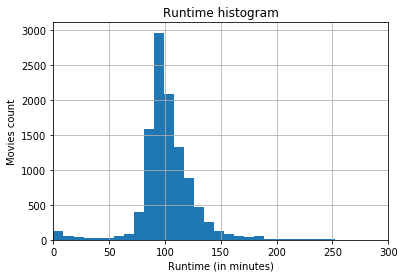

In [24]:
df.runtime.hist(bins=100)
plt.xlabel('Runtime (in minutes)')
plt.ylabel('Movies count')
plt.title('Runtime histogram')
plt.xlim((0,300))
plt.show()

We can see that the histogram is unimodal, skewed right. Most of the movies are between 1 and 3 hours long, which seems plausible.

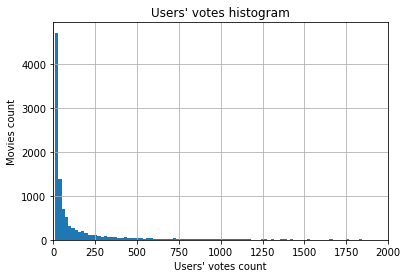

In [45]:
df.users_voted.hist(bins=500)
plt.xlabel('Users\' votes count')
plt.ylabel('Movies count')
plt.title('Users\' votes histogram')
plt.xlim((0,2000))
plt.show()

Seems that the majority of movies don't have any votes, the distribution is similar to exponential, but even steeper. Let's zoom in a bit more.

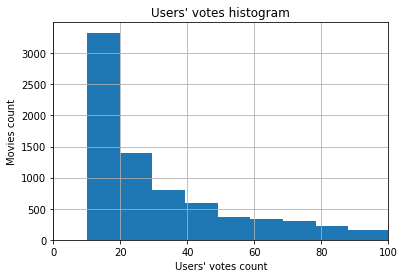

In [47]:
df.users_voted.hist(bins=1000)
plt.xlabel('Users\' votes count')
plt.ylabel('Movies count')
plt.title('Users\' votes histogram')
plt.xlim((0,100))
plt.show()

In [50]:
df[df.users_voted<20].shape[0]

3330

After having a closer look, we can see that every movie has some votes, but 3330 (about 1/3 of the whole dataset) of them has less than 20 votes

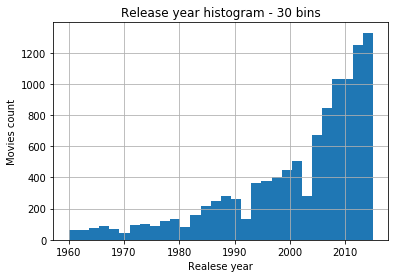

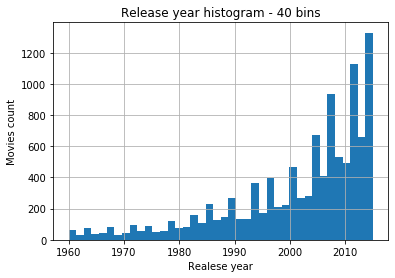

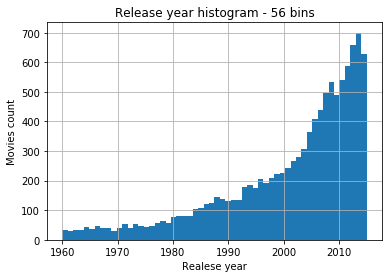

In [81]:
unique_years = df.release_year.nunique()
for num_bins in [30,40,unique_years]:
    df.release_year.hist(bins=num_bins)
    plt.xlabel('Realese year')
    plt.ylabel('Movies count')
    plt.title('Release year histogram - {} bins'.format(num_bins))
    plt.show()

For release year the shape of the plot differs a lot depending on the selected bin size. First diagram has a few sudden drops, on the second one we can observe multiple significant spikes and the last one in which there is one bin per year displays a much smoother distribution. Despite the differences, all plots render an increasing number of movies made over time. This does not necessarily mean that in general less movies were made in earlier years, because it might be that for newer movie it is easier to obtain the data and that is why they are better represented in the dataset.

In [113]:
df[df.budget==0].shape[0]

5696

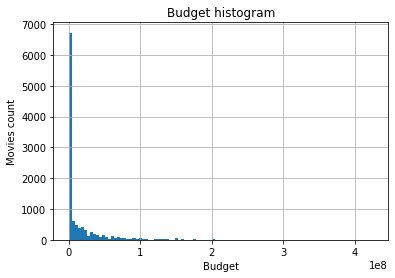

In [145]:
df.budget.hist(bins=100)
plt.xlabel('Budget')
plt.ylabel('Movies count')
plt.title('Budget histogram')
# plt.ylim((0,1000))
plt.show()

Of course, the movie count decreases as the budget increases. A lot of movies have hardly any budget, let's check the exact numbers.

In [138]:
print("{} movies have no budget".format(df[df.budget==0].shape[0]))

5696 movies have no budget


It seems unbelievable that more than half of movies in the dataset have no budget. Maybe 0 was used to fill missing values in this column. Let us see some examples of movies that supposedly have no budget. 

In [148]:
df[df.budget==0].sort_values(by='users_voted',ascending=False).head()

,id,title,cast,director,runtime,genres,release_date,users_voted,rating,release_year,budget,revenue
7410,4638,Hot Fuzz,Simon Pegg|Nick Frost|Timothy Dalton|Jim Broad...,Edgar Wright,121,Crime|Action|Comedy,2007-02-14,1329,3.60,2007,0,80573774
5450,122906,About Time,Rachel McAdams|Bill Nighy|Domhnall Gleeson|Tom...,Richard Curtis,123,Comedy|Drama|Science Fiction,2013-08-16,1329,3.85,2013,0,87100449
746,188161,A Million Ways to Die in the West,Seth MacFarlane|Charlize Theron|Liam Neeson|Am...,Seth MacFarlane,116,Comedy|Western,2014-05-22,1074,2.95,2014,0,0
2419,37135,Tarzan,Tony Goldwyn|Glenn Close|Minnie Driver|Brian B...,Chris Buck|Kevin Lima,88,Adventure|Animation|Drama|Family,1999-06-18,912,3.45,1999,0,0
693,200727,"Love, Rosie",Lily Collins|Sam Claflin|Suki Waterhouse|Chris...,Christian Ditter,102,Comedy|Romance,2014-07-02,904,3.80,2014,0,4439431


Thanks to the nature of this specific dataset we can use external sources (aka the Internet) to check the data. The movie "Hot Fuzz" that is on the top of the table in the cell above can be found on iMDB (https://www.imdb.com/title/tt0425112/). It's budget was 8 million pounds. So clearly many (if not all) the movies that have zeros as in the budget column in fact have missing data. Below is a plot containing movies only with positive budgets.

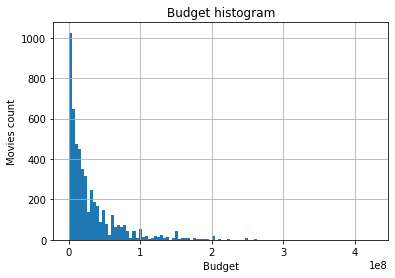

In [149]:
df[df.budget!=0].budget.hist(bins=100)
plt.xlabel('Budget')
plt.ylabel('Movies count')
plt.title('Budget histogram')
# plt.ylim((0,1000))
plt.show()

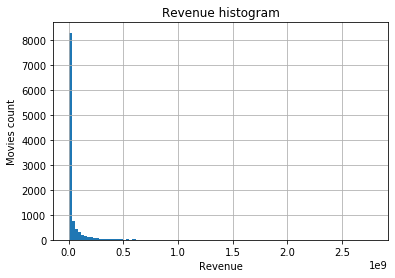

In [150]:
df.revenue.hist(bins=100)
plt.xlabel('Revenue')
plt.ylabel('Movies count')
plt.title('Revenue histogram')
# plt.ylim((0,1000))
plt.show()

In [153]:
df[df.revenue==0].sort_values(by='users_voted',ascending=False).head()

,id,title,cast,director,runtime,genres,release_date,users_voted,rating,release_year,budget,revenue
5457,107985,The World's End,Simon Pegg|Nick Frost|Martin Freeman|Eddie Mar...,Edgar Wright,109,Comedy|Action|Science Fiction,2013-07-18,1143,3.30,2013,20000000,0
5460,138697,Don Jon,Joseph Gordon-Levitt|Scarlett Johansson|Julian...,Joseph Gordon-Levitt,90,Comedy|Drama,2013-07-26,1136,2.95,2013,6000000,0
5470,146216,RED 2,Bruce Willis|Catherine Zeta-Jones|Anthony Hopk...,Dean Parisot,116,Action|Comedy|Crime|Thriller,2013-07-18,1109,3.15,2013,84000000,0
746,188161,A Million Ways to Die in the West,Seth MacFarlane|Charlize Theron|Liam Neeson|Am...,Seth MacFarlane,116,Comedy|Western,2014-05-22,1074,2.95,2014,0,0
4408,59962,This Means War,Reese Witherspoon|Chris Pine|Tom Hardy|Laura V...,McG,103,Action|Comedy|Romance,2012-02-14,1011,2.95,2012,65000000,0


Here we have a similar situation as with the budget. The revenue of "The World's End" according to iMDB is $ 26,004,851. A plot with positive revenues should be more informative.

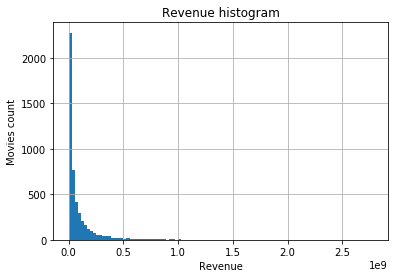

In [157]:
df[df.revenue!=0].revenue.hist(bins=100)
plt.xlabel('Revenue')
plt.ylabel('Movies count')
plt.title('Revenue histogram')
# plt.ylim((0,1000))
plt.show()

## Part 4: Basic associations

After we have inspected the individual values, it's time to start checking combinations of events, e.g. does the rating correlate with the budget or the revenue? Does the budget correlate with revenue? Analyze what your findings mean

[20 minutes]

---

In [2]:
#YOUR CODE HERE


## Part 5:  Determining the Most Successful Movies 

This is an example of an analysis of the "grouped property" type.

Think of some reasonable definitions of what it could mean to be a "most successful movie", e.g. could be the movie that brought more income (that is revenue reduced by the budget) or could be the highest rated movies.

[15 minutes] 

---

For example, we can determine the "best successful" movie by year! Determine the best movie in each year.

In [ ]:
#Using .groupby, we can divide the dataframe into subsets by the values of 'year'.
#We can then iterate over these subsets
for year, subset in df.groupby('year'):
    #Find the best book of the year
    ####### 
    #   Insert your code
    ####### 

Try this for few other definitions of the "best book" using `.groupby`. Comment on the analysis (also use common sense)

## Part 6:  Trends in Popularity of Genres 

This is an example of an analysis of the "grouped property" type.

There are a lot of questions you could ask about genres.
* Which genre is currently the most popular?
* Do you reach the same conclusions if you use as indication of popularity the revenue or the rating?
* Better, based on our data, what draw conclusions can you draw about the time evolution of the popularity of each genre?

[20 minutes]

---

First we need to find the distinct genres in the dataframe. 

To do this, notice that each string is a pipe (|) separated list of genres. For each string, we ask if the genre is in that pipe separated list.  If it is, we return True, else False

**Hint: remember that python sets have unique (non-repeating) items.**

In [ ]:
#Get the unique genres contained in the dataframe.
####### 
#   Insert your code
####### 

What happens if we add a column to the dataframe for each genre? 

Is this way of representing genre efficient? Allows for easy computation and visualization?

Are there other ways to represent genre information in the dataframe that allow for each visualization?

In [ ]:
#Add a column for each genre
####### 
#   Insert your code
####### 
df.shape

Now explore some ways to visualize the genres represented in the dataframe. 

For example, you might ask which is the most represented genre.

In [ ]:
#Explore different ways to visualize information about the genres in the dataframe
####### 
#   Insert your code
####### 

### Part 6.1: What can you conclude from the above visualizations?
[15 min]

Pick two or three genres and describe how the popularity of these genres fluctuates with time.  

## Part 7: Conclusions

[15 min/remaining time]


Summarize your conclusions here by highlighting some of your achievements. Make sure to answer both parts below

### 7.1 Limitations
Are there any specific limitations in this dataset? Can we consider it complete? Is it noisy? Are there any ethical concerns?

### 7.2 Main findings
Summarize your findings below